In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install Augmentor
from Augmentor import Pipeline # for image augmentation

#Import libraries and folders

In [1]:
import os    # to handle operating system dependent functionalities.
import cv2   # for image preprocessing tasks
import matplotlib.pyplot as plt # for visualize the data
import numpy as np  # for numerical computations
import glob  # to find all the pathnames
import shutil # for copying the original dataset
from sklearn.model_selection import train_test_split
from random import shuffle
from os.path import join
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix, classification_report


In [ ]:
base_path = '/content/drive/MyDrive/FYP_Serpify'   # base path to the folders in g drive

#Explore Dataset

In [ ]:
# access the parent folder of the classes named 'Dataset'
input_folder = os.path.join(base_path, 'Dataset')

# Get the list of class folders
class_folders = os.listdir(input_folder)

print("Number of data in a class")
print()

#Print the number of data in each class by iterating over the class folders
class_counts = {}
for class_name in class_folders:
    if not class_name.startswith('.'): # check if the class_name starts with a dot
        class_path = os.path.join(input_folder, class_name)
        images = os.listdir(class_path)
        num_images = len(images)
        class_counts[class_name] = num_images
        print(f" {class_name}': {num_images}")

Number of data in a class

 Ahatulla': 48
 Aluradanakaya': 110
 Aranidathkatiya': 30
 Kunakatuwa': 140
 Naya': 145
 Thelkarawala': 114
 Diyabariya': 58
 Garandiya': 50
 Haldanda': 45
 Katakaluwa': 59
 Lemapila': 40
 Malradanakaya': 68
 Nidimapila': 46
 Pimbura': 63
 Pullidathkatiya': 44
 Thithpolanga': 94


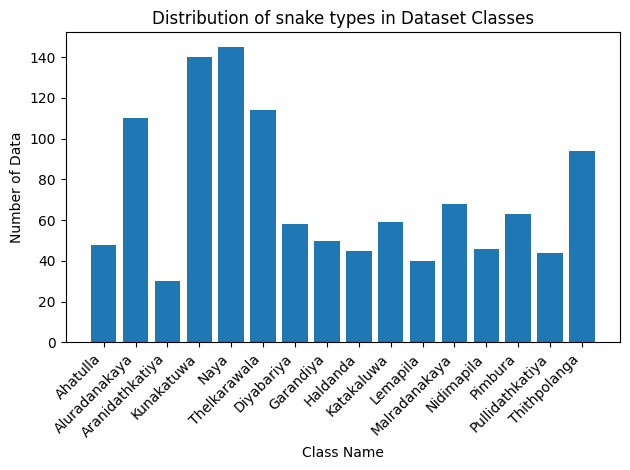

In [ ]:
class_names = list(class_counts.keys())
counts = list(class_counts.values())

# Create the bar chart
plt.bar(class_names, counts)

plt.xlabel("Class Name")
plt.ylabel("Number of Data")
plt.title("Distribution of snake types in Dataset Classes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

#Augmentation and balance the Dataset

##Create the output folder if it doesn't exist to save preprocessed images

In [ ]:
output_folder = os.path.join(base_path, 'Preprocessed_Dataset_New')
os.makedirs(output_folder, exist_ok=True)

In [ ]:
# Function to calculate the number of samples per class based on existing images and desired total samples
def calculate_num_samples(class_path, desired_total_samples=1000):
    existing_images = len(os.listdir(class_path))
    num_samples = max(0, desired_total_samples - existing_images) #augment only the additional count
    return num_samples

# Function for data augmentation
def augment_and_save_images(input_folder, desired_total_samples=1000, output_class_folder=output_folder):
    class_folders = os.listdir(input_folder)

    for class_name in class_folders:
        if not class_name.startswith('.'):
            class_path = os.path.join(input_folder, class_name)
            output_path = os.path.join(output_class_folder, class_name)

            # Calculate the number of samples to generate per class
            num_samples_per_class = calculate_num_samples(class_path, desired_total_samples)

            # Create augmentation pipeline
            p = Pipeline(source_directory=class_path, output_directory=output_path)
            p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
            p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=8)
            p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
            p.rotate90(probability=0.5)
            p.flip_left_right(probability=0.4)
            p.flip_top_bottom(probability=0.8)
            p.rotate270(probability=0.5)

            # Check if there are images in the source directory
            if not p.augmentor_images:
                raise IndexError(f"There are no images in the source directory: {class_path}")




            # Generate augmented images
            p.sample(num_samples_per_class)

# Specify the desired total number of samples
desired_total_samples = 1000

# Define the output class folder
output_class_folder = os.path.join('../../', 'Preprocessed_Dataset_New')


In [ ]:
# Call the function with the desired total samples
augment_and_save_images(input_folder, desired_total_samples, output_class_folder)

Initialised with 48 image(s) found.
Output directory set to /content/drive/MyDrive/FYP_Serpify/Dataset/Ahatulla/../../Preprocessed_Dataset_New/Ahatulla.

Processing <PIL.Image.Image image mode=RGB size=1315x1315 at 0x7CC501F98DF0>: 100%|██████████| 952/952 [11:44<00:00,  1.35 Samples/s]


Initialised with 110 image(s) found.
Output directory set to /content/drive/MyDrive/FYP_Serpify/Dataset/Aluradanakaya/../../Preprocessed_Dataset_New/Aluradanakaya.

Processing <PIL.Image.Image image mode=RGB size=358x358 at 0x7CC50365D4B0>: 100%|██████████| 890/890 [01:19<00:00, 11.14 Samples/s]


Initialised with 30 image(s) found.
Output directory set to /content/drive/MyDrive/FYP_Serpify/Dataset/Aranidathkatiya/../../Preprocessed_Dataset_New/Aranidathkatiya.

Processing <PIL.Image.Image image mode=RGB size=581x581 at 0x7CC502133B20>: 100%|██████████| 970/970 [01:21<00:00, 11.89 Samples/s]


Initialised with 140 image(s) found.
Output directory set to /content/drive/MyDrive/FYP_Serpify/Dataset/Kunakatuwa/../../Preprocessed_Dataset_New/Kunakatuwa.

Processing <PIL.Image.Image image mode=RGB size=3000x3000 at 0x7CC50243AEC0>: 100%|██████████| 860/860 [05:58<00:00,  2.40 Samples/s]


Initialised with 145 image(s) found.
Output directory set to /content/drive/MyDrive/FYP_Serpify/Dataset/Naya/../../Preprocessed_Dataset_New/Naya.

Processing <PIL.Image.Image image mode=RGB size=1842x1842 at 0x7CC501B9E260>: 100%|██████████| 855/855 [08:58<00:00,  1.59 Samples/s]


Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/FYP_Serpify/Dataset/Thelkarawala/../../Preprocessed_Dataset_New/Thelkarawala.

Processing <PIL.Image.Image image mode=RGB size=303x303 at 0x7CC501BFD360>: 100%|██████████| 886/886 [06:27<00:00,  2.29 Samples/s]


Initialised with 58 image(s) found.
Output directory set to /content/drive/MyDrive/FYP_Serpify/Dataset/Diyabariya/../../Preprocessed_Dataset_New/Diyabariya.

Processing <PIL.Image.Image image mode=RGB size=720x720 at 0x7CC50215C820>: 100%|██████████| 942/942 [09:30<00:00,  1.65 Samples/s]


Initialised with 50 image(s) found.
Output directory set to /content/drive/MyDrive/FYP_Serpify/Dataset/Garandiya/../../Preprocessed_Dataset_New/Garandiya.

Processing <PIL.Image.Image image mode=RGB size=260x260 at 0x7CC5022C2230>: 100%|██████████| 950/950 [01:07<00:00, 14.10 Samples/s]


Initialised with 45 image(s) found.
Output directory set to /content/drive/MyDrive/FYP_Serpify/Dataset/Haldanda/../../Preprocessed_Dataset_New/Haldanda.

Processing <PIL.Image.Image image mode=RGB size=926x926 at 0x7CC5024B6080>: 100%|██████████| 955/955 [09:34<00:00,  1.66 Samples/s]


Initialised with 59 image(s) found.
Output directory set to /content/drive/MyDrive/FYP_Serpify/Dataset/Katakaluwa/../../Preprocessed_Dataset_New/Katakaluwa.

Processing <PIL.Image.Image image mode=RGB size=2315x2315 at 0x7CC502008F70>: 100%|██████████| 941/941 [14:06<00:00,  1.11 Samples/s]


Initialised with 40 image(s) found.
Output directory set to /content/drive/MyDrive/FYP_Serpify/Dataset/Lemapila/../../Preprocessed_Dataset_New/Lemapila.

Processing <PIL.Image.Image image mode=RGB size=3000x3000 at 0x7CC50215F3D0>: 100%|██████████| 960/960 [18:53<00:00,  1.18s/ Samples]


Initialised with 68 image(s) found.
Output directory set to /content/drive/MyDrive/FYP_Serpify/Dataset/Malradanakaya/../../Preprocessed_Dataset_New/Malradanakaya.

Processing <PIL.Image.Image image mode=RGB size=395x395 at 0x7CC50249DF30>: 100%|██████████| 932/932 [01:02<00:00, 14.92 Samples/s]


Initialised with 46 image(s) found.
Output directory set to /content/drive/MyDrive/FYP_Serpify/Dataset/Nidimapila/../../Preprocessed_Dataset_New/Nidimapila.

Processing <PIL.Image.Image image mode=RGB size=481x481 at 0x7CC501BFFC10>: 100%|██████████| 954/954 [00:51<00:00, 18.46 Samples/s]


Initialised with 63 image(s) found.
Output directory set to /content/drive/MyDrive/FYP_Serpify/Dataset/Pimbura/../../Preprocessed_Dataset_New/Pimbura.

Processing <PIL.Image.Image image mode=RGB size=1127x1127 at 0x7CC501C1CBE0>: 100%|██████████| 937/937 [08:43<00:00,  1.79 Samples/s]


Initialised with 44 image(s) found.
Output directory set to /content/drive/MyDrive/FYP_Serpify/Dataset/Pullidathkatiya/../../Preprocessed_Dataset_New/Pullidathkatiya.

Processing <PIL.Image.Image image mode=RGB size=313x313 at 0x7CC501BFFB50>: 100%|██████████| 956/956 [01:21<00:00, 11.78 Samples/s]


Initialised with 94 image(s) found.
Output directory set to /content/drive/MyDrive/FYP_Serpify/Dataset/Thithpolanga/../../Preprocessed_Dataset_New/Thithpolanga.

Processing <PIL.Image.Image image mode=RGB size=341x341 at 0x7CC50365FA30>: 100%|██████████| 906/906 [03:13<00:00,  4.68 Samples/s]


##Copy the original Dataset into the augmented dataset saved location

In [ ]:
def copy_original_images(input_parent_folder, output_parent_folder):
    class_folders = os.listdir(input_parent_folder)

    for class_name in class_folders:
        if not class_name.startswith('.'):
            class_input_path = os.path.join(input_parent_folder, class_name)
            class_output_path = os.path.join(output_parent_folder, class_name)

            # Ensure that the output directory exists
            os.makedirs(class_output_path, exist_ok=True)

            # Copy original images to the output directory
            original_images = [image_file for image_file in os.listdir(class_input_path) if image_file.endswith('.jpg')]

            for image_file in original_images:
                source_path = os.path.join(class_input_path, image_file)
                dest_path = os.path.join(class_output_path, image_file)

                # Check if the source file exists before copying
                if os.path.exists(source_path):
                    shutil.copy2(source_path, dest_path)
                else:
                    print(f"Warning: Source file not found: {source_path}")

# Specify the input and output parent folders
input_parent_folder = os.path.join(base_path, 'Dataset')
output_parent_folder = os.path.join(base_path, 'Preprocessed_Dataset_New')

# Call the function to copy original images
copy_original_images(input_parent_folder, output_parent_folder)

#Explore dataset after balanced

In [ ]:
# access the parent folder of the classes named 'Dataset'
preprocess_folder = os.path.join(base_path, 'Preprocessed_Dataset_New')

# Get the list of class folders
class_folders = os.listdir(preprocess_folder)

print("Number of data in a class")
print()

preclass_counts = {}
for class_name in class_folders:
    if not class_name.startswith('.'): # check if the class_name starts with a dot
        class_path = os.path.join(preprocess_folder, class_name)
        images = os.listdir(class_path)
        num_images = len(images)
        preclass_counts[class_name] = num_images
        print(f" {class_name}': {num_images}")

Number of data in a class

 Ahatulla': 1000
 Aluradanakaya': 1000
 Aranidathkatiya': 1000
 Kunakatuwa': 1000
 Naya': 1000
 Thelkarawala': 1000
 Diyabariya': 1000
 Garandiya': 1000
 Haldanda': 1000
 Katakaluwa': 1000
 Lemapila': 1000
 Malradanakaya': 1000
 Nidimapila': 1000
 Pimbura': 1000
 Pullidathkatiya': 1000
 Thithpolanga': 1000


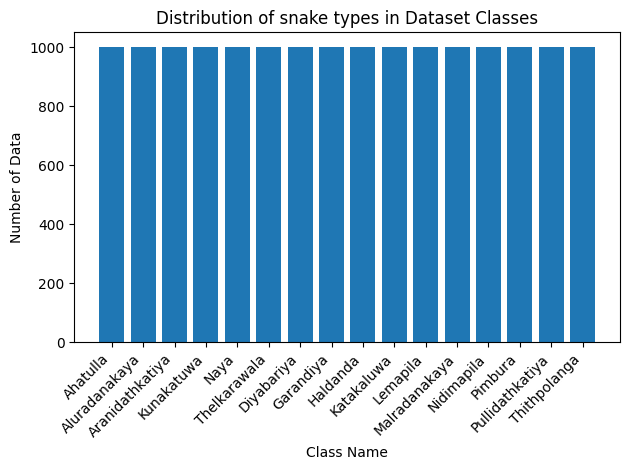

In [ ]:
class_names = list(preclass_counts.keys())
counts = list(preclass_counts.values())

# Create the bar chart
plt.bar(class_names, counts)

plt.xlabel("Class Name")
plt.ylabel("Number of Data")
plt.title("Distribution of snake types in Dataset Classes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## Further preprocessing

##Resize the original image

In [ ]:
def resize_image(image):
    return cv2.resize(image, (256, 256))

##Sharping using addweighted

In [ ]:
def apply_sharping(image):
    gaussian_blur = cv2.GaussianBlur(image, (7, 7), 2)
    return cv2.addWeighted(image, 1.5, gaussian_blur, -0.5, 0)

##Apply Noise Reduction

In [ ]:
def apply_noise_reduction(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 5, 3, 7, 12)

##save preprocessed images

In [ ]:
def save_image(image, output_path):
    cv2.imwrite(output_path, image)

##Define the Preprocess function

In [ ]:
def preprocess_image(image_path, output_class_folder):
    try:
        # Read the original image
        original_image = cv2.imread(image_path)

        # Resize the original image
        resized_image = resize_image(original_image)

        # Apply sharping
        sharpened_image = apply_sharping(resized_image)

        # Apply noise reduction
        preprocessed_image = apply_noise_reduction(sharpened_image)

        # Save the preprocessed image

        output_path = os.path.join(output_class_folder, os.path.basename(image_path))
        save_image(preprocessed_image, output_path)

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

In [ ]:
# Iterate over each class folder
for class_folder in class_folders:
  if not class_name.startswith('.'):
    class_folder_path = os.path.join(preprocess_folder, class_folder)

    # Check if the class_folder_path is a directory
    if os.path.isdir(class_folder_path):

        # Create the corresponding class folder in the output directory
        output_class_folder = os.path.join(output_parent_folder, class_folder)
        os.makedirs(output_class_folder, exist_ok=True)

        # Use glob to get the list of image file paths in the class_folder_path
        image_file_paths = glob.glob(os.path.join(class_folder_path, '*.jpg'))

        # Iterate over each image in the class folder and preprocess
        for image_path in image_file_paths:
            preprocess_image(image_path, output_class_folder)

        # Print the class name which are compleated
        print(f"{class_folder} : images processed.")

    else:
        print(f"The {class_folder} is not a class folder.")

print()
print("Image preprocessing complete.")


Ahatulla : images processed.
Aluradanakaya : images processed.
Aranidathkatiya : images processed.
Kunakatuwa : images processed.
Naya : images processed.
Thelkarawala : images processed.
Diyabariya : images processed.
Garandiya : images processed.
Haldanda : images processed.
Katakaluwa : images processed.
Lemapila : images processed.
Malradanakaya : images processed.
Nidimapila : images processed.
Pimbura : images processed.
Pullidathkatiya : images processed.
Thithpolanga : images processed.

Image preprocessing complete.


# Split Dataset

In [ ]:
#create output folder
splitdata_folder = os.path.join(base_path, 'Split_Dataset')
os.makedirs(splitdata_folder, exist_ok=True)

##load dataset

In [ ]:
# Set the paths to your dataset and output folders
dataset_path = "/content/drive/MyDrive/FYP_Serpify/Preprocessed_Dataset_New"
output_path = "/content/drive/MyDrive/FYP_Serpify/Split_Dataset"

# Create the output folders if they don't exist
os.makedirs(output_path, exist_ok=True)
os.makedirs(join(output_path, "seg_train"), exist_ok=True)
os.makedirs(join(output_path, "seg_test"), exist_ok=True)

In [ ]:
# Iterate through each class folder in the dataset
for class_folder in os.listdir(dataset_path):
    class_path = join(dataset_path, class_folder)

    # Get the list of image files in the class folder
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Print the dataset count for the current class folder
    print(f" {class_folder}': {len(image_files)}")

 Ahatulla': 1000
 Aluradanakaya': 1000
 Aranidathkatiya': 1000
 Kunakatuwa': 1000
 Naya': 1000
 Thelkarawala': 1000
 Diyabariya': 1000
 Garandiya': 1000
 Haldanda': 1000
 Katakaluwa': 1000
 Lemapila': 1000
 Malradanakaya': 1000
 Nidimapila': 1000
 Pimbura': 1000
 Pullidathkatiya': 1000
 Thithpolanga': 1000


##Split dataset into training and testing

In [ ]:
# Iterate through each class folder in the dataset
for class_folder in os.listdir(dataset_path):
    class_path = join(dataset_path, class_folder)

    # Get the list of image files in the class folder
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Shuffle the image files for random splitting
    shuffle(image_files)

    # Split the images into 80% train and 20% test sets
    split_index = int(0.8 * len(image_files))
    train_images = image_files[:split_index]
    test_images = image_files[split_index:]

    # Create the corresponding class folders in the output folders
    os.makedirs(join(output_path, "seg_train", class_folder), exist_ok=True)
    os.makedirs(join(output_path, "seg_test", class_folder), exist_ok=True)

    # Copy and rename images to the train and test folders with numeric labels
    image_count = 1
    for image_file in train_images:
        source_path = join(class_path, image_file)
        dest_path = join(output_path, "seg_train", class_folder, f"{image_count}.jpg")
        shutil.copy(source_path, dest_path)
        image_count += 1

    print(f"Copied {len(train_images)} images to train folder for class {class_folder}")

    image_count = 1
    for image_file in test_images:
        source_path = join(class_path, image_file)
        dest_path = join(output_path, "seg_test", class_folder, f"{image_count}.jpg")
        shutil.copy(source_path, dest_path)
        image_count += 1

    print(f"Copied {len(test_images)} images to test folder for class {class_folder}")

Copied 800 images to train folder for class Ahatulla
Copied 200 images to test folder for class Ahatulla
Copied 800 images to train folder for class Aluradanakaya
Copied 200 images to test folder for class Aluradanakaya
Copied 800 images to train folder for class Aranidathkatiya
Copied 200 images to test folder for class Aranidathkatiya
Copied 800 images to train folder for class Kunakatuwa
Copied 200 images to test folder for class Kunakatuwa
Copied 800 images to train folder for class Naya
Copied 200 images to test folder for class Naya
Copied 800 images to train folder for class Thelkarawala
Copied 200 images to test folder for class Thelkarawala
Copied 800 images to train folder for class Diyabariya
Copied 200 images to test folder for class Diyabariya
Copied 800 images to train folder for class Garandiya
Copied 200 images to test folder for class Garandiya
Copied 800 images to train folder for class Haldanda
Copied 200 images to test folder for class Haldanda
Copied 800 images to 

In [ ]:
traindataset_path = "/content/drive/MyDrive/FYP_Serpify/Split_Dataset/seg_train"
# Iterate through each class folder in the dataset
for class_folder in os.listdir(traindataset_path):
    class_path = join(traindataset_path, class_folder)

    # Get the list of image files in the class folder
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Print the dataset count for the current class folder
    print(f" {class_folder}': {len(image_files)}")

 Ahatulla': 800
 Aluradanakaya': 800
 Aranidathkatiya': 800
 Kunakatuwa': 800
 Naya': 800
 Thelkarawala': 800
 Diyabariya': 800
 Garandiya': 800
 Haldanda': 800
 Katakaluwa': 800
 Lemapila': 800
 Malradanakaya': 800
 Nidimapila': 800
 Pimbura': 800
 Pullidathkatiya': 800
 Thithpolanga': 800


In [ ]:
testdataset_path = "/content/drive/MyDrive/FYP_Serpify/Split_Dataset/seg_test"
# Iterate through each class folder in the dataset
for class_folder in os.listdir(testdataset_path):
    class_path = join(testdataset_path, class_folder)

    # Get the list of image files in the class folder
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Print the dataset count for the current class folder
    print(f" {class_folder}': {len(image_files)}")

 Ahatulla': 200
 Aluradanakaya': 200
 Aranidathkatiya': 200
 Kunakatuwa': 200
 Naya': 200
 Thelkarawala': 200
 Diyabariya': 200
 Garandiya': 200
 Haldanda': 200
 Katakaluwa': 200
 Lemapila': 200
 Malradanakaya': 200
 Nidimapila': 200
 Pimbura': 200
 Pullidathkatiya': 200
 Thithpolanga': 200


# Model creation and training

## Load data

In [2]:
# Set paths to your train and test directories
train_dir = "Include/Dataset/Split_Dataset/seg_train"
test_dir = "Include/Dataset/Split_Dataset/seg_test"

# Create image data generators for train and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,  # Apply random rotations for data augmentation
    width_shift_range=0.2,  # Apply random width shifts
    height_shift_range=0.2,  # Apply random height shifts
    shear_range=0.2,  # Apply random shearing
    zoom_range=0.2,  # Apply random zooming
    horizontal_flip=True  # Apply random horizontal flipping
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of images and labels for training and testing
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 12800 images belonging to 16 classes.
Found 3200 images belonging to 16 classes.


In [3]:
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)

    # Get the list of image files in the class folder
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Print the dataset count for the current class folder
    print(f" {class_folder}': {len(image_files)}")

 Ahatulla': 800
 Aluradanakaya': 800
 Aranidathkatiya': 800
 Diyabariya': 800
 Garandiya': 800
 Haldanda': 800
 Katakaluwa': 800
 Kunakatuwa': 800
 Lemapila': 800
 Malradanakaya': 800
 Naya': 800
 Nidimapila': 800
 Pimbura': 800
 Pullidathkatiya': 800
 Thelkarawala': 800
 Thithpolanga': 800


In [4]:
#Generate a single batch of images and labels
images, labels = next(train_generator)

In [5]:
#shapes of the outputs
print(images.shape)
print(labels.shape)

(32, 256, 256, 3)
(32, 16)


In [6]:
#Print the class names
print(train_generator.class_indices)

{'Ahatulla': 0, 'Aluradanakaya': 1, 'Aranidathkatiya': 2, 'Diyabariya': 3, 'Garandiya': 4, 'Haldanda': 5, 'Katakaluwa': 6, 'Kunakatuwa': 7, 'Lemapila': 8, 'Malradanakaya': 9, 'Naya': 10, 'Nidimapila': 11, 'Pimbura': 12, 'Pullidathkatiya': 13, 'Thelkarawala': 14, 'Thithpolanga': 15}


##Define Model Architecture

In [5]:
# Create a sequential model
SpModel = Sequential([
    # Convolutional layers with activation and pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (5, 5), activation='relu'), 
    MaxPooling2D((2, 2)),
    # Flatten the outputs to feed into dense layers
    Flatten(),
    # Dense layers with activation
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(16, activation='softmax')  # Output layer with 16 classes
])

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
SpModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 123, 123, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    13,779,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,914,384 (53.08 MB)

 Trainable params: 13,914,384 (53.08 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#Compile the Model
SpModel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:

# Train the model on the training data
serpify = SpModel.fit(train_generator,
                    epochs=20,
                    validation_data=test_generator)

Epoch 1/20


c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


400/400 ━━━━━━━━━━━━━━━━━━━━ 548s 1s/step - accuracy: 0.0833 - loss: 2.7711 - val_accuracy: 0.1469 - val_loss: 2.5895
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 432s 1s/step - accuracy: 0.1783 - loss: 2.5326 - val_accuracy: 0.2381 - val_loss: 2.3686
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 430s 1s/step - accuracy: 0.2455 - loss: 2.3076 - val_accuracy: 0.2953 - val_loss: 2.2116
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 430s 1s/step - accuracy: 0.2942 - loss: 2.1545 - val_accuracy: 0.3675 - val_loss: 1.9966
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 427s 1s/step - accuracy: 0.3482 - loss: 1.9905 - val_accuracy: 0.4172 - val_loss: 1.8440
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 427s 1s/step - accuracy: 0.3993 - loss: 1.8520 - val_accuracy: 0.4394 - val_loss: 1.8793
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 428s 1s/step - accuracy: 0.4401 - loss: 1.7126 - val_accuracy: 0.4663 - val_loss: 1.7005
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 430s 1s/step - accuracy: 0.5028 - loss: 1.5591 - val_accuracy: 0.519

##Evaluate the Model

In [9]:
# Evaluate model performance on the test set
test_loss, test_acc = SpModel.evaluate(test_generator)
print('Test accuracy:', test_acc)

100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 223ms/step - accuracy: 0.7471 - loss: 0.8587
Test accuracy: 0.7496874928474426


##Plot Accuracy and Loss

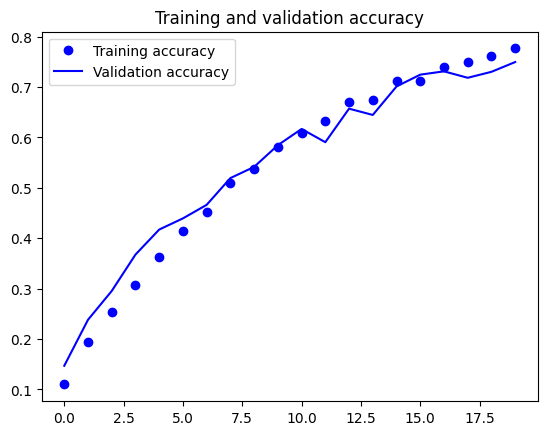

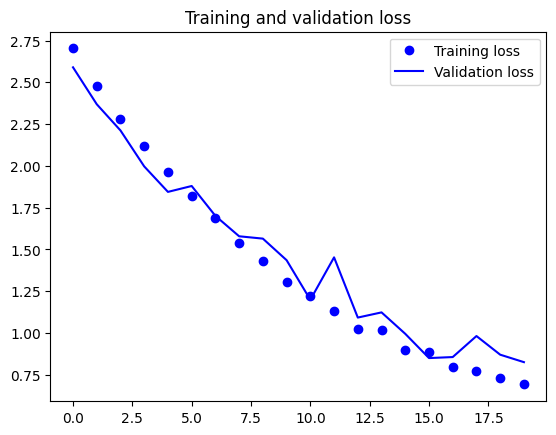

In [10]:
acc = serpify.history['accuracy']
val_acc = serpify.history['val_accuracy']
loss = serpify.history['loss']
val_loss = serpify.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Save the model

In [16]:
folder_path = 'Include/TrainedModal/SerpifyModels/'
file_path = os.path.join(folder_path, 'SerpifyModelS2.h5')

SpModel.save(file_path)

# Model Performance Test

In [2]:
# Load model
folder_path = 'Include/TrainedModal/SerpifyModels/'
model = tf.keras.models.load_model(folder_path+'/SerpifyModelS2.h5')

In [3]:
# Load testing dataset
test_dir = "Include/Dataset/Split_Dataset/seg_test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 3200 images belonging to 16 classes.


In [4]:
# Accuracy and loss
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 237ms/step - accuracy: 0.7519 - loss: 0.8327
Test accuracy: 0.7496874928474426
Test loss: 0.8251674771308899


In [6]:
step_per_epoch = int(3200/32)
predictions = np.array([])
labels =  np.array([])
for step in range(step_per_epoch):
    X, y = next(test_generator)
    prediction = model.predict(X)
    predictions = np.concatenate([predictions, np.argmax(prediction, axis = -1)])
    labels = np.concatenate([labels, np.argmax(y, axis=-1)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [7]:
# Accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, predictions)
print(f'Test accuracy: {accuracy * 100:.2f}%')

Test accuracy: 74.88%


In [8]:
# Accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, predictions)
print('Accuracy: %f' % accuracy)

# Precision: tp / (tp + fp)
precision = precision_score(labels, predictions, average='macro')  #reference : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
print('Precision: %f' % precision)

# Recall: tp / (tp + fn)
recall = recall_score(labels, predictions, average='macro')
print('Recall: %f' % recall)

# F1 Score: 2*tp / (2*tp + fp + fn)
f1 = f1_score(labels, predictions, average='macro')
print('F1 Score: %f' % f1)

# Kappa
kappa = cohen_kappa_score(labels, predictions)
print('Cohens Kappa: %f' % kappa)



Accuracy: 0.748750
Precision: 0.768781
Recall: 0.748714
F1 Score: 0.750361
Cohens Kappa: 0.731995


In [9]:
# Confusion Matrix
matrix = confusion_matrix(labels, predictions)
print("confusion_matrix")
print(matrix)

confusion_matrix
[[197   0   0   1   0   0   0   1   1   0   0   0   0   0   0   0]
 [  0 115   3  10   3  10   1   1   1  10   2   1   4   2  26  11]
 [  0   3 184   4   1   0   0   2   3   0   1   0   0   0   1   1]
 [  1   7   0 167   1   3   2   0   6   4   2   0   2   4   1   0]
 [  1   4   0  22 141   7   2   0   1   0   5   0   1   1  15   0]
 [  2   0   0  13   4 148   3   8   5   4   1   0   1   2   0   4]
 [  1   2   0  29   5   6 121   1  17   2   6   1   0   1   8   0]
 [  0   9   1  21   4   4   1 110   7   3  20   6   4   4   3   3]
 [  0   0   0  11   0   4   1   4 182   0   0   1   0   0   0   0]
 [  0   9   0  23   2   4   0   2   4 138   6   6   1   6   0   2]
 [  0  10   3  12   3   7   1   2   4   2 139   1   1   2   9   4]
 [  0  11   4   6   3   0   2   1   8   5   6 137   1  10   3   1]
 [  0   5   0   4   2   0   0   0   2   1   4   0 175   0   1   5]
 [  0  18   1   6   3   3   1   7   1  11   9   6   0 131   4   1]
 [  0   6   0   8   0   0   1   2   4   2   3

In [10]:
print('Classification Report:\n', classification_report(labels, predictions))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       200
         1.0       0.56      0.57      0.57       200
         2.0       0.94      0.92      0.93       200
         3.0       0.49      0.83      0.61       200
         4.0       0.82      0.70      0.76       200
         5.0       0.73      0.76      0.74       195
         6.0       0.89      0.60      0.72       200
         7.0       0.75      0.55      0.64       200
         8.0       0.73      0.90      0.80       203
         9.0       0.75      0.68      0.72       203
        10.0       0.65      0.69      0.67       200
        11.0       0.86      0.69      0.77       198
        12.0       0.90      0.88      0.89       199
        13.0       0.78      0.65      0.71       202
        14.0       0.68      0.85      0.75       201
        15.0       0.80      0.70      0.75       199

    accuracy                           0.75      3200
  

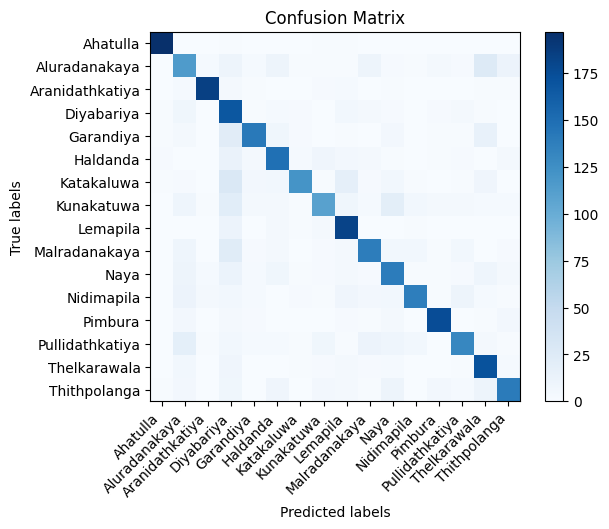

In [11]:
plt.imshow(matrix, cmap=plt.cm.Blues)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(test_generator.class_indices)), test_generator.class_indices.keys(),rotation=45, ha='right')
plt.yticks(np.arange(len(test_generator.class_indices)), test_generator.class_indices.keys())
plt.show()